## Analysis On Default Credit Case Study

* **Business Context** - Banks are primarily known for money lending business. The more money they lend to people whom they can get good interest with timely repayment, the more revenue is for the banks.
* **
* The more banks are able to identify borrowers going towards serious delinquency rate, the better will be the bank's money lending business which in turn will lead to better revenue and better image in the market and with respect to competitiors. 
* **
* * **Delinquent** in general is a slightly mild term where a borrower is not repaying charges and is behind by certain months whereas * **Default** is a term where a borrower has not been able to pay charges and is behind for a long period of months and is unlikely to repay the charges.
* **
* We have a general profile about the borrower such as age, Monthly Income, Dependents and the historical data such as what is the Debt Ratio, what ratio of amount is owed wrt credit limit, and the no of times defaulted in the past one, two, three months.
* We will be using all these features to predict whether the borrower is likely to delinquent in the next 2 years or not.
* These kind of predictions will help banks to take necessary actions.


* **Objective** : Building a model using the inputs/attributes which are general profile and historical records of a borrower to predict whether one is likely to have serious delinquency in the next 2 years 

In [71]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis
from sklearn.tree import DecisionTreeClassifier
from scipy import stats, special
from scipy.stats import skew
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Importing ML algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_score, f1_score,roc_auc_score,auc,roc_curve
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [73]:
import tensorflow as tf
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers

In [74]:
df = pd.read_csv("CreditDataset.csv")
df.shape

(150000, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [76]:
round(df.isnull().sum(axis = 0)/len(df),2)*100

Unnamed: 0                               0.0
SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           20.0
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       3.0
dtype: float64

In [77]:
df.head(10)

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   
5           6                 0                              0.213179   74   
6           7                 0                              0.305682   57   
7           8                 0                              0.754464   39   
8           9                 0                              0.116951   27   
9          10                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                     2     0.802982         9120.0   
1                                     0     0.121876         2600.0   
2                                     1     0.085113         3042.0   
3                                     0     0.036050         3300.0   
4                                     1     0.024926        63588.0   
5                                     0     0.375607         3500.0   
6                                     0  5710.000000            NaN   
7                                     0     0.209940         3500.0   
8                                     0    46.000000            NaN   
9                                     0     0.606291        23684.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   
5                                3                        0   
6                                8                        0   
7                                8                        0   
8                                2                        0   
9                                9                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   
5                             1                                     0   
6                             3                                     0   
7                             0                                     0   
8                             0                                     0   
9                             4                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 1.0  
6                 0.0  
7                 0.0  
8                 NaN  
9                 2.0

In [78]:
df["Unnamed: 0"].nunique()/len(df)

1.0

In [79]:
df.drop(columns = 'Unnamed: 0',inplace=True)
df.head(10)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   
5                 0                              0.213179   74   
6                 0                              0.305682   57   
7                 0                              0.754464   39   
8                 0                              0.116951   27   
9                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                     2     0.802982         9120.0   
1                                     0     0.121876         2600.0   
2                                     1     0.085113         3042.0   
3                                     0     0.036050         3300.0   
4                                     1     0.024926        63588.0   
5                                     0     0.375607         3500.0   
6                                     0  5710.000000            NaN   
7                                     0     0.209940         3500.0   
8                                     0    46.000000            NaN   
9                                     0     0.606291        23684.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   
5                                3                        0   
6                                8                        0   
7                                8                        0   
8                                2                        0   
9                                9                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   
5                             1                                     0   
6                             3                                     0   
7                             0                                     0   
8                             0                                     0   
9                             4                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 1.0  
6                 0.0  
7                 0.0  
8                 NaN  
9                 2.0

In [80]:
print(df['SeriousDlqin2yrs'].unique())
percentage_Serious_Deliquency = (df['SeriousDlqin2yrs']).sum()/ len(df) * 100
print('{}% of the borrrowers are failing in Serious Delinquency'.format(percentage_Serious_Deliquency))


[1 0]
6.683999999999999% of the borrrowers are failing in Serious Delinquency


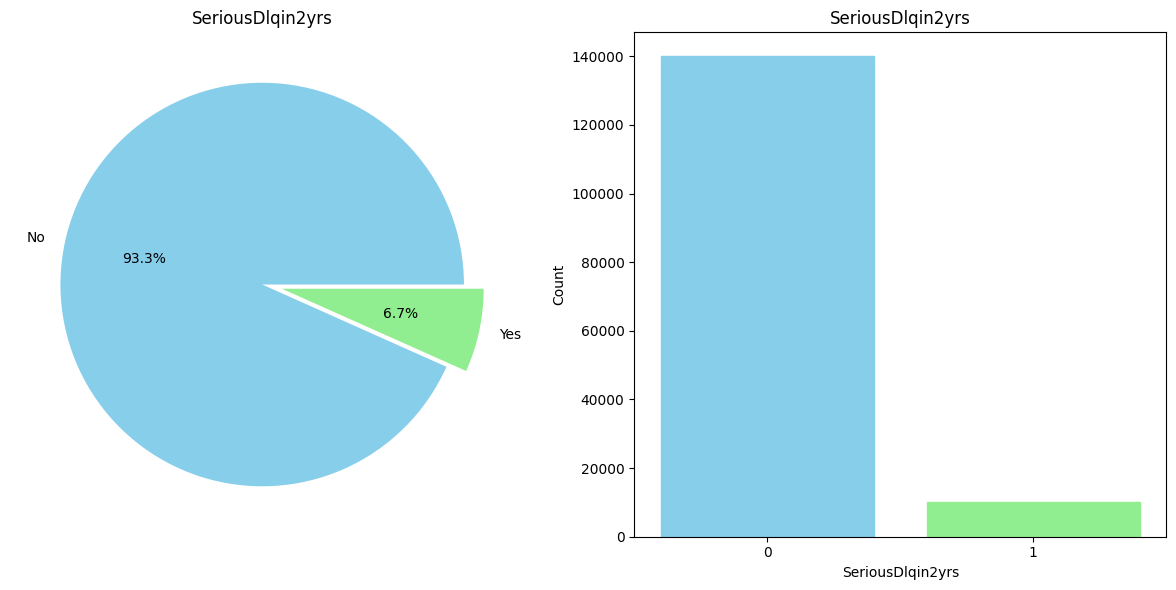

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], labels=['No', 'Yes'])
plt.title('SeriousDlqin2yrs')
plt.ylabel('') 

plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='SeriousDlqin2yrs')
ax.set_title('SeriousDlqin2yrs')
ax.set_xlabel('SeriousDlqin2yrs')
ax.set_ylabel('Count')


for p, color in zip(ax.patches, ['skyblue', 'lightgreen']):
    p.set_color(color)
plt.tight_layout() 
plt.show()


In [82]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [83]:
df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2037.818523   1.438467e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175074   3.400000e+03   
50%                                0.000000       0.366508   5.400000e+03   
75%                                0.000000       0.868254   8.249000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    150000.000000            150000.000000   
mean                          8.452760                 0.265973   
std                           5.145951                 4.169304   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 150000.000000                         150000.000000   
mean                       1.018240                              0.240387   
std                        1.129771                              4.155179   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  
count       146076.000000  
mean             0.757222  
std              1.115086  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max             20.000000

### Separating the dataset into train-test split

In [84]:
X = df.drop(columns = ['SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs']

In [85]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test.shape, X_train.shape

((30000, 10), (120000, 10))

In [86]:
print('Event rate in the training dataset : ',np.mean(y_train))
print()
print('Event rate in the test dataset : ',np.mean(y_test))
print()
print('Event rate in the entire dataset : ',np.mean(y))

Event rate in the training dataset :  0.06684166666666666

Event rate in the test dataset :  0.06683333333333333

Event rate in the entire dataset :  0.06684


In [87]:
train = pd.concat([X_train, y_train], axis=1)
train.shape

(120000, 11)

In [88]:
test = pd.concat([X_test, y_test], axis=1)
test.shape

(30000, 11)

### Univariate Analysis using Training Numerical dataset

In [89]:
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[train[column].notnull()][column], kde=True, ax=ax1)
    sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(train[train[column].notnull()][column]))
    print("kurtosis : ",kurtosis(train[train[column].notnull()][column]))
    plt.show()

In [90]:
def plot_count_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(train[train[column].notnull()][column],ax=ax1)
    sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(train[train[column].notnull()][column]))
    print("kurtosis : ",kurtosis(train[train[column].notnull()][column]))
    plt.show()


skewness :  99.14282373943726
kurtosis :  14370.263366125106


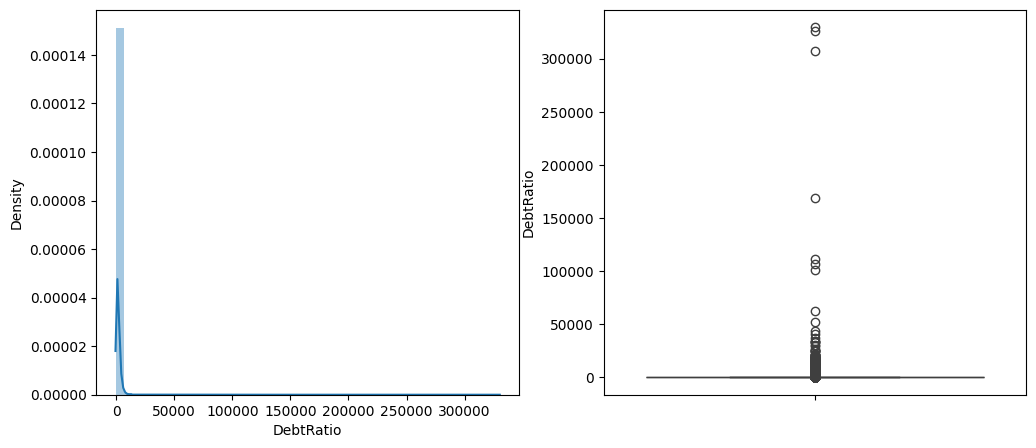

In [91]:
plot_hist_boxplot('DebtRatio')


skewness :  0.18619637326841987
kurtosis :  -0.498427938670404


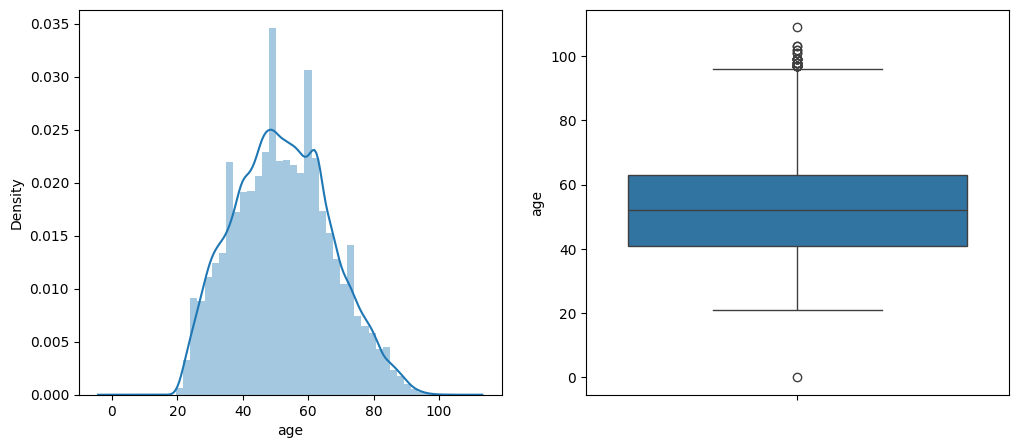

In [92]:
plot_hist_boxplot('age')

skewness :  23.393598377179494
kurtosis :  548.632426633495


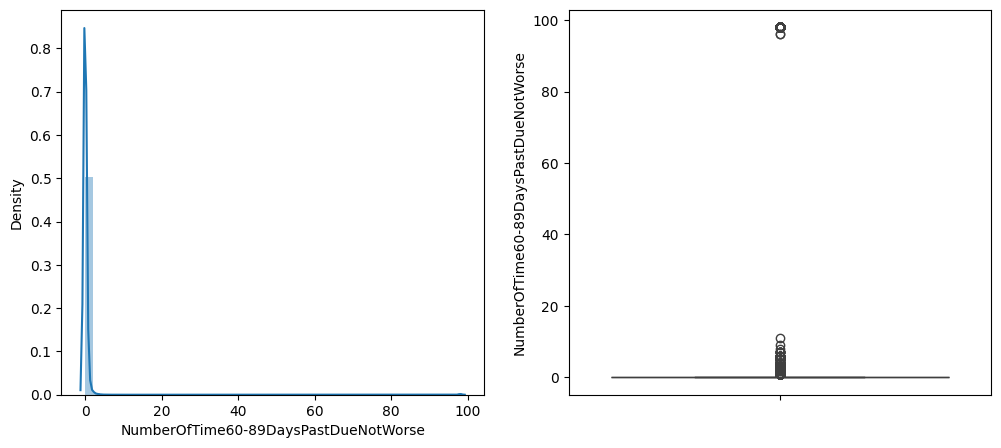

In [93]:
plot_hist_boxplot('NumberOfTime60-89DaysPastDueNotWorse')

skewness :  22.656444686738023
kurtosis :  525.1798137690517


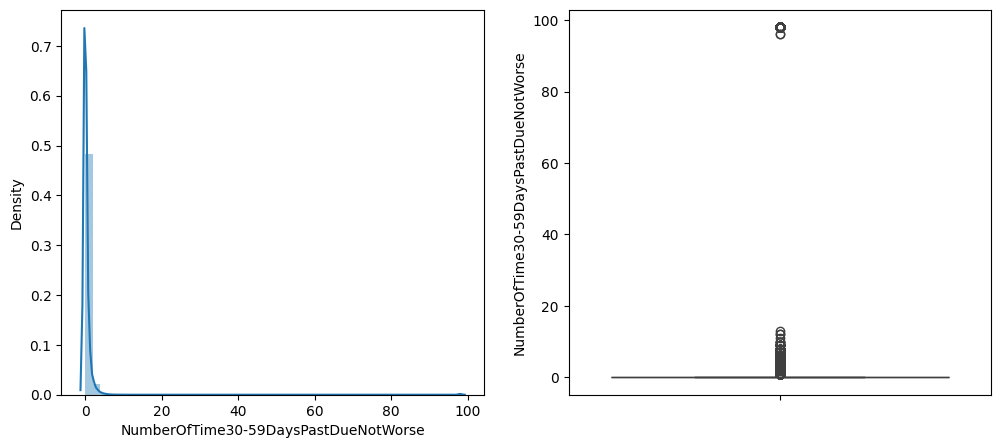

In [94]:
plot_hist_boxplot('NumberOfTime30-59DaysPastDueNotWorse')


skewness :  23.155584699487473
kurtosis :  540.8745184818808


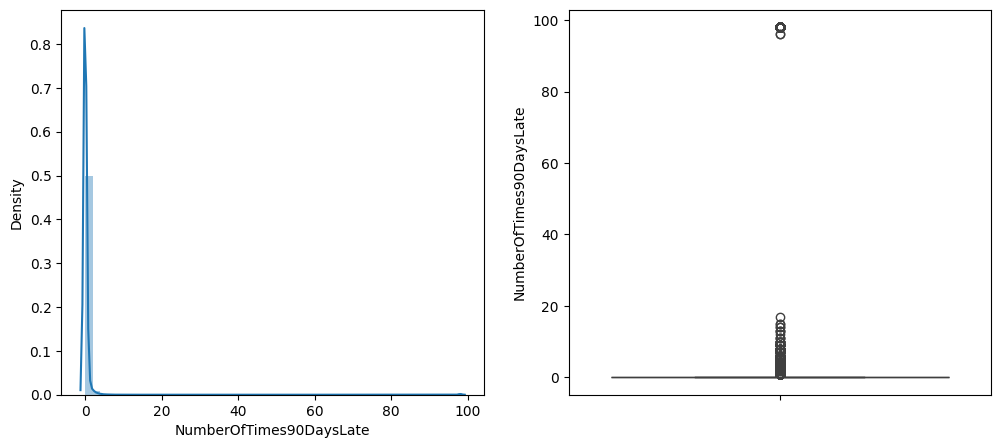

In [95]:
plot_hist_boxplot('NumberOfTimes90DaysLate')

In [96]:
cols_for_stats = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']


In [97]:
skewness  = [] ; kurt = []
for column in cols_for_stats:
    skewness.append(skew(train[train[column].notnull()][column]))
    kurt.append(kurtosis(train[train[column].notnull()][column]))
    
stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt},index=[col for col in cols_for_stats])
stats.sort_values(by=['Skewness'], ascending=False)


Skewness      Kurtosis
MonthlyIncome                         122.587602  21861.235155
RevolvingUtilizationOfUnsecuredLines  100.538203  15559.574874
DebtRatio                              99.142824  14370.263366
NumberOfTime60-89DaysPastDueNotWorse   23.393598    548.632427
NumberOfTimes90DaysLate                23.155585    540.874518
NumberOfTime30-59DaysPastDueNotWorse   22.656445    525.179814
NumberRealEstateLoansOrLines            3.752641     71.087650
NumberOfDependents                      1.598556      3.178548
NumberOfOpenCreditLinesAndLoans         1.228632      3.178869
age                                     0.186196     -0.498428

### Data Cleaning

* *From the above boxplot graphs we can observe:*
* **
* *In the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range beyond 90 which is common across all 3 features.*
* **
* *Treating outliers for the columns  -- NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate*

In [98]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                       ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                    ['NumberOfTimes90DaysLate']))


print("Unique values in '30-59 Days' values that are less than 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                           ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                        ['NumberOfTimes90DaysLate']))


print("Proportion of positive class with special 96/98 values:",
      round(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2),'%')

Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '30-59 Days' values that are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Proportion of positive class with special 96/98 values: 54.67 %


In [99]:
train.loc[train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 12
train.loc[train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
train.loc[train['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

print("Unique values in 30-59Days", np.unique(train['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(train['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(train['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in 60-89Days [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


In [100]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                       ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                    ['NumberOfTimes90DaysLate']))


print("Unique values in '30-59 Days' values that are less than 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                           ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                        ['NumberOfTimes90DaysLate']))


Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '30-59 Days' values that are less than 90: [0 1 2 3 4 5 6 7 8 9]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [0 1 2 3 4 5 6 7 8]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


* *Since, these values exist in Test Set as well. Therefore, replacing them with maximum values before 96 and 98 i.e. 13, 7 and 15.*

In [101]:
test.loc[test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
test.loc[test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 7
test.loc[test['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 15
print("Unique values in 30-59Days", np.unique(test['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(test['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(test['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 13]
Unique values in 60-89Days [0 1 2 3 4 5 6 7 8]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15]


* *Checking for * **DebtRatio**

In [102]:
print('Debt Ratio: \n',train['DebtRatio'].describe())

Debt Ratio: 
 count    120000.000000
mean        352.271245
std        2093.709509
min           0.000000
25%           0.175330
50%           0.366194
75%           0.860833
max      329664.000000
Name: DebtRatio, dtype: float64


* The data is right skewed. So, we would check the potential outliers beyond 95% quantiles. However, since our data is 120,000,  we considerd 95% and 97.5% quantiles for our further analysis.

In [103]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

SeriousDlqin2yrs  MonthlyIncome
count       6002.000000     299.000000
mean           0.053149       0.086957
std            0.224349       0.282244
min            0.000000       0.000000
25%            0.000000       0.000000
50%            0.000000       0.000000
75%            0.000000       0.000000
max            1.000000       1.000000

 Observation
* Out of 6002 customers falling in the last 5 percentile of the data i.e. the number of times their debt is higher than their income, only 299 have Monthly Income values.
* The Max for Monthly Income is 1 and Min is 0 which makes us wonder that are data entry errors. Checking whether the Serious Delinquency in 2 years and Monthly Income values are equal.

In [104]:
train[(train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])].shape[0]

260

There are 260 out of 299 rows where Monthly Income is equal to the Serious Delinquencies in 2 years. Hence we remove these 260 outliers from our analysis as their current values aren't useful for our predictive modelling and will add to the bias and variance.

In [105]:
new_train = train[-((train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome']))]
new_train.shape

(119740, 11)

* **Age**

In [106]:
new_train[['age', 'SeriousDlqin2yrs']].describe()

age  SeriousDlqin2yrs
count  119740.000000     119740.000000
mean       52.292041          0.066970
std        14.778070          0.249971
min         0.000000          0.000000
25%        41.000000          0.000000
50%        52.000000          0.000000
75%        63.000000          0.000000
max       109.000000          1.000000

* It can be observed that the data includes a record with age = 0 which is not a valid age ,updating the record with mode age.

In [107]:
new_train[new_train['age']<1]

RevolvingUtilizationOfUnsecuredLines  age  \
65695                                   1.0    0   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
65695                                     1   0.436927         6000.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
65695                                6                        0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
65695                             2                                     0   

       NumberOfDependents  SeriousDlqin2yrs  
65695                 2.0                 0

Replacing the error/odd value with the mode

In [108]:
new_train.loc[new_train['age'] == 0, 'age'] = new_train.age.mode()[0]
new_train['age'].min()

21

In [109]:
new_test = test[test['RevolvingUtilizationOfUnsecuredLines']<=10]
new_test.shape

(29949, 11)

#### Missing Value Treatment
* *Since MonthlyIncome is an integer value, we replaced the nulls with the median values instead of mean as it was heavily right skewed.*
* **
* *Number of Dependents can be characterized as a categorical variable, hence if customers have NA for number of dependents, it means that they do not have any dependents. 
Filling either by mode which is 0 .

In [110]:
def MissingHandler(df):
    
    DataMissing = df.isnull().sum()*100/len(df)
    DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
    DataMissingByColumn.sort_values(by='Percentage Nulls',ascending=False,inplace=True)
    return DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]


In [111]:
new_train['MonthlyIncome'].fillna(new_train['MonthlyIncome'].median(), inplace=True)
new_train['NumberOfDependents'].fillna(0, inplace = True)

* **Filling missing values with the same logic on the validation and the test dataset**

In [112]:
new_test['MonthlyIncome'].fillna(new_test['MonthlyIncome'].median(), inplace=True)
new_test['NumberOfDependents'].fillna(0, inplace = True)

In [113]:
MissingHandler(new_train)


Empty DataFrame
Columns: [Percentage Nulls]
Index: []

In [114]:
MissingHandler(new_test)

Empty DataFrame
Columns: [Percentage Nulls]
Index: []

### Corelation Analysis

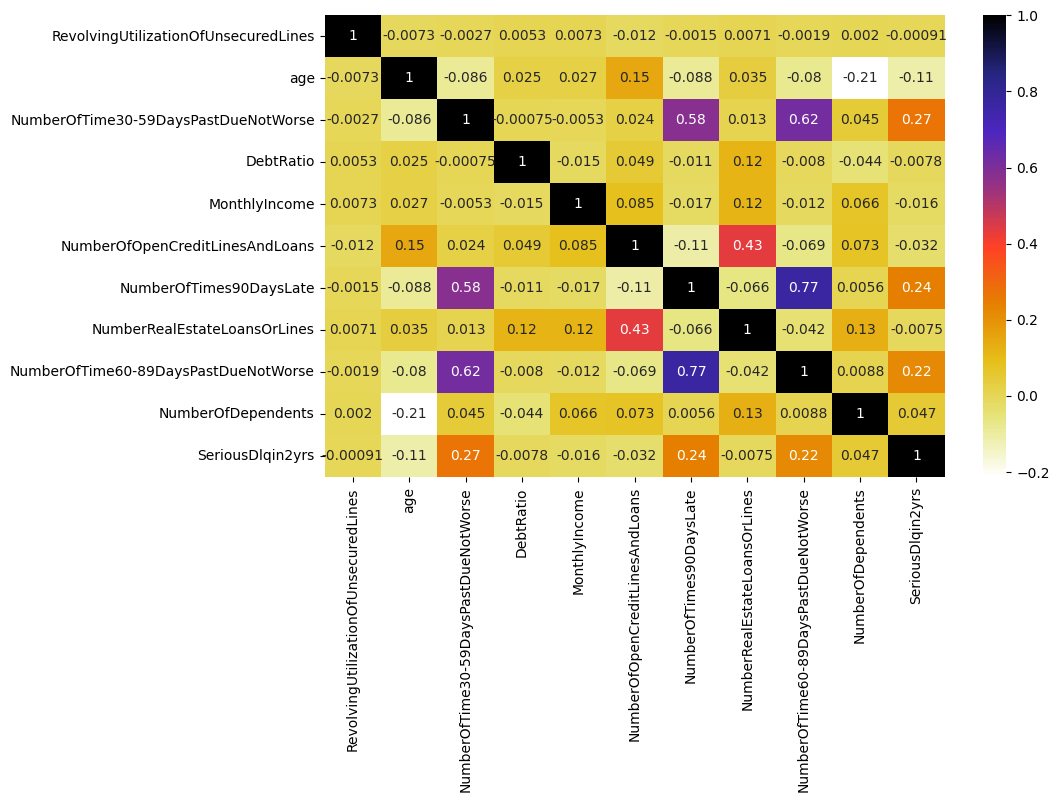

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(new_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Bivariate Analysis

In [116]:
def boxplot_violinplot(col1, col2):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax1)
    sns.violinplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax2)
    plt.show()

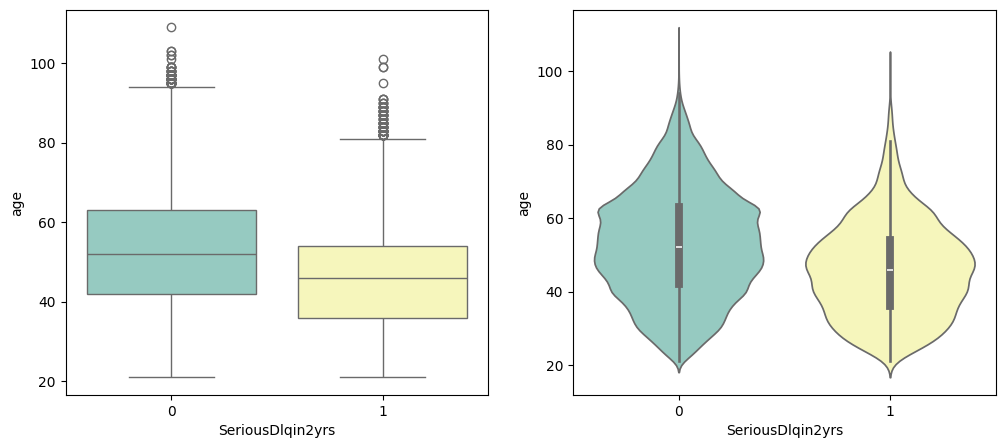

In [117]:
boxplot_violinplot('SeriousDlqin2yrs', 'age')

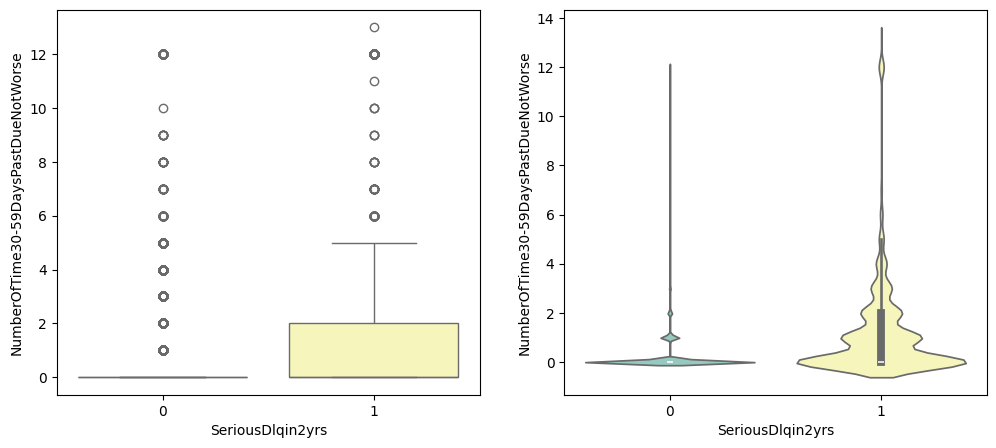

In [118]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse')

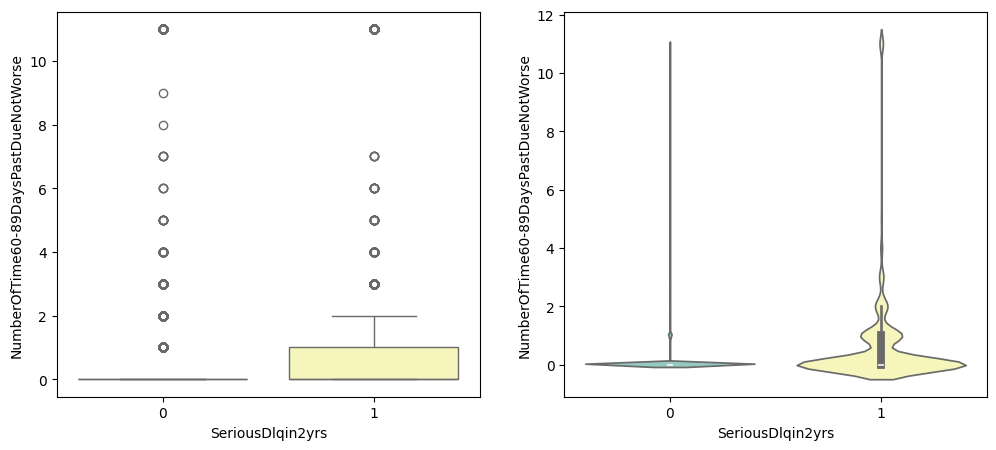

In [119]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime60-89DaysPastDueNotWorse')

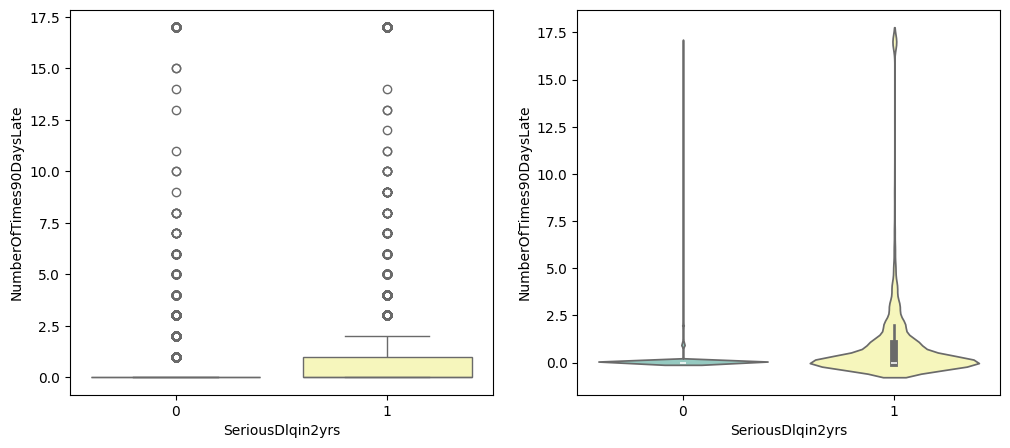

In [120]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTimes90DaysLate')

* It is expected that the higher the utlization ratio, the higher the default rate is. Let me look into that by plotting the utlization ratio to default rate

### Feature Engineering

In [121]:
dataset = [new_train, new_test]

In [122]:
for data in dataset:
    
    data['CombinedPastDue']     = data['NumberOfTime30-59DaysPastDueNotWorse'] + data['NumberOfTime60-89DaysPastDueNotWorse'] + data['NumberOfTimes90DaysLate']
    data['CombinedCreditLoans'] = data['NumberOfOpenCreditLinesAndLoans'] + data['NumberRealEstateLoansOrLines']
    
new_train.columns    

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans'],
      dtype='object')

* Interaction of the features

In [123]:
for data in dataset:

    data['MonthlyIncomePerPerson'] = data['MonthlyIncome']/(data['NumberOfDependents']+1)
    
    data['MonthlyDebt']            = data['MonthlyIncome']*data['DebtRatio']
    
    data['isRetired']              = np.where((data['age'] > 65), 1, 0)
    
    data['RevolvingLines']         = data['NumberOfOpenCreditLinesAndLoans']-data['NumberRealEstateLoansOrLines']
    data['hasRevolvingLines']      = np.where((data['RevolvingLines']>0),1,0)
    
    data['hasMultipleRealEstates'] = np.where((data['NumberRealEstateLoansOrLines']>=2),1,0)
    
    data['IsAlone']                = np.where((data['NumberOfDependents']==0),1,0)
    
new_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans', 'MonthlyIncomePerPerson', 'MonthlyDebt',
       'isRetired', 'RevolvingLines', 'hasRevolvingLines',
       'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

In [124]:
new_train.shape, new_test.shape

((119740, 20), (29949, 20))

In [125]:
print(new_train['SeriousDlqin2yrs'].sum()/len(new_train))
print()
print(new_test['SeriousDlqin2yrs'].sum()/len(new_test))

0.06697010188742275

0.06694714347724465



    * Upsampling the minority class
    * Downsampling the majority class
    * SMOTE - synthethic sampling


In [126]:
X_train = new_train.drop(columns=['SeriousDlqin2yrs'],axis=1)
y_train = new_train['SeriousDlqin2yrs']

X_test = new_test.drop(columns=['SeriousDlqin2yrs'],axis=1)
y_test = new_test['SeriousDlqin2yrs']

#### Upsampling

In [127]:
X_majority = new_train[new_train['SeriousDlqin2yrs']==0]
X_minority = new_train[new_train['SeriousDlqin2yrs']==1]

In [128]:



X_minority_upsampled = resample(X_minority, replace=True, n_samples=100000, random_state=42)
X_upsampled = pd.concat([X_majority,X_minority_upsampled])
X_upsampled['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    111721
1    100000
Name: count, dtype: int64

In [129]:
y_train_upsampled = X_upsampled['SeriousDlqin2yrs']

X_upsampled.drop(columns=['SeriousDlqin2yrs'],axis=1, inplace=True)

X_upsampled.shape, X_test.shape, y_train_upsampled.shape, y_test.shape

((211721, 19), (29949, 19), (211721,), (29949,))

#### Downsampling

In [130]:
new_train['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    111721
1      8019
Name: count, dtype: int64

In [131]:
X_majority_downsampled = resample(X_majority, n_samples=8000, random_state=42)
X_downsampled = pd.concat([X_minority,X_majority_downsampled])
X_downsampled['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    8019
0    8000
Name: count, dtype: int64

In [132]:
y_train_downsampled = X_downsampled['SeriousDlqin2yrs']

X_downsampled.drop(columns=[ 'SeriousDlqin2yrs'],axis=1, inplace=True)

X_downsampled.shape, X_test.shape, y_train_downsampled.shape, y_test.shape


((16019, 19), (29949, 19), (16019,), (29949,))

#### SMOTE

In [133]:
smote = SMOTE(sampling_strategy = 'minority',k_neighbors = 2,random_state=42)
os_data_X,os_data_y=smote.fit_resample(X_train,y_train)

In [134]:
os_data_X.shape, sum(os_data_y)/len(os_data_y)

((223442, 19), 0.5)

* Now the event rate in the training dataset is 50%

In [135]:
os_data_X_tranformed  = os_data_X.copy()
X_test_transformed   = X_test.copy()

X_test_standaradized = X_test.copy()

In [136]:

X_upsampled_transformed   = X_upsampled.copy()
X_downsampled_transformed = X_downsampled.copy()

## Scaling
 * LogTransformations
 * Standaradization

In [137]:
def SkewMeasure(df):
    nonObjectColList = df.dtypes[df.dtypes != 'object'].index
    skewM = df[nonObjectColList].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
    skewM=pd.DataFrame({'skew':skewM})
    return skewM[abs(skewM)>0.5].dropna()

In [138]:
SkewMeasure(os_data_X_tranformed)

skew
MonthlyIncome                         152.433311
MonthlyIncomePerPerson                114.755089
RevolvingUtilizationOfUnsecuredLines  100.658816
MonthlyDebt                            99.344320
DebtRatio                              97.872765
NumberOfTime60-89DaysPastDueNotWorse    8.735995
NumberOfTimes90DaysLate                 8.264560
CombinedPastDue                         8.219034
NumberOfTime30-59DaysPastDueNotWorse    5.121509
NumberRealEstateLoansOrLines            3.598986
isRetired                               2.558783
NumberOfDependents                      1.412255
hasMultipleRealEstates                  1.347083
RevolvingLines                          1.280191
NumberOfOpenCreditLinesAndLoans         1.111764
CombinedCreditLoans                     1.108994
hasRevolvingLines                      -4.170414

#### Log Transformation

In [139]:
def apply_log_transformation(df_train, df_test):
    skewM = SkewMeasure(df_train)
    
    for i in skewM.index:
        df_train[i] = np.log1p(df_train[i])
        df_test[i]  = np.log1p(df_test[i])
    
    return df_train, df_test

os_data_X_transformed = os_data_X.copy()
X_test_transformed = X_test.copy()
os_data_X_transformed, X_test_transformed = apply_log_transformation(os_data_X_transformed, X_test_transformed)


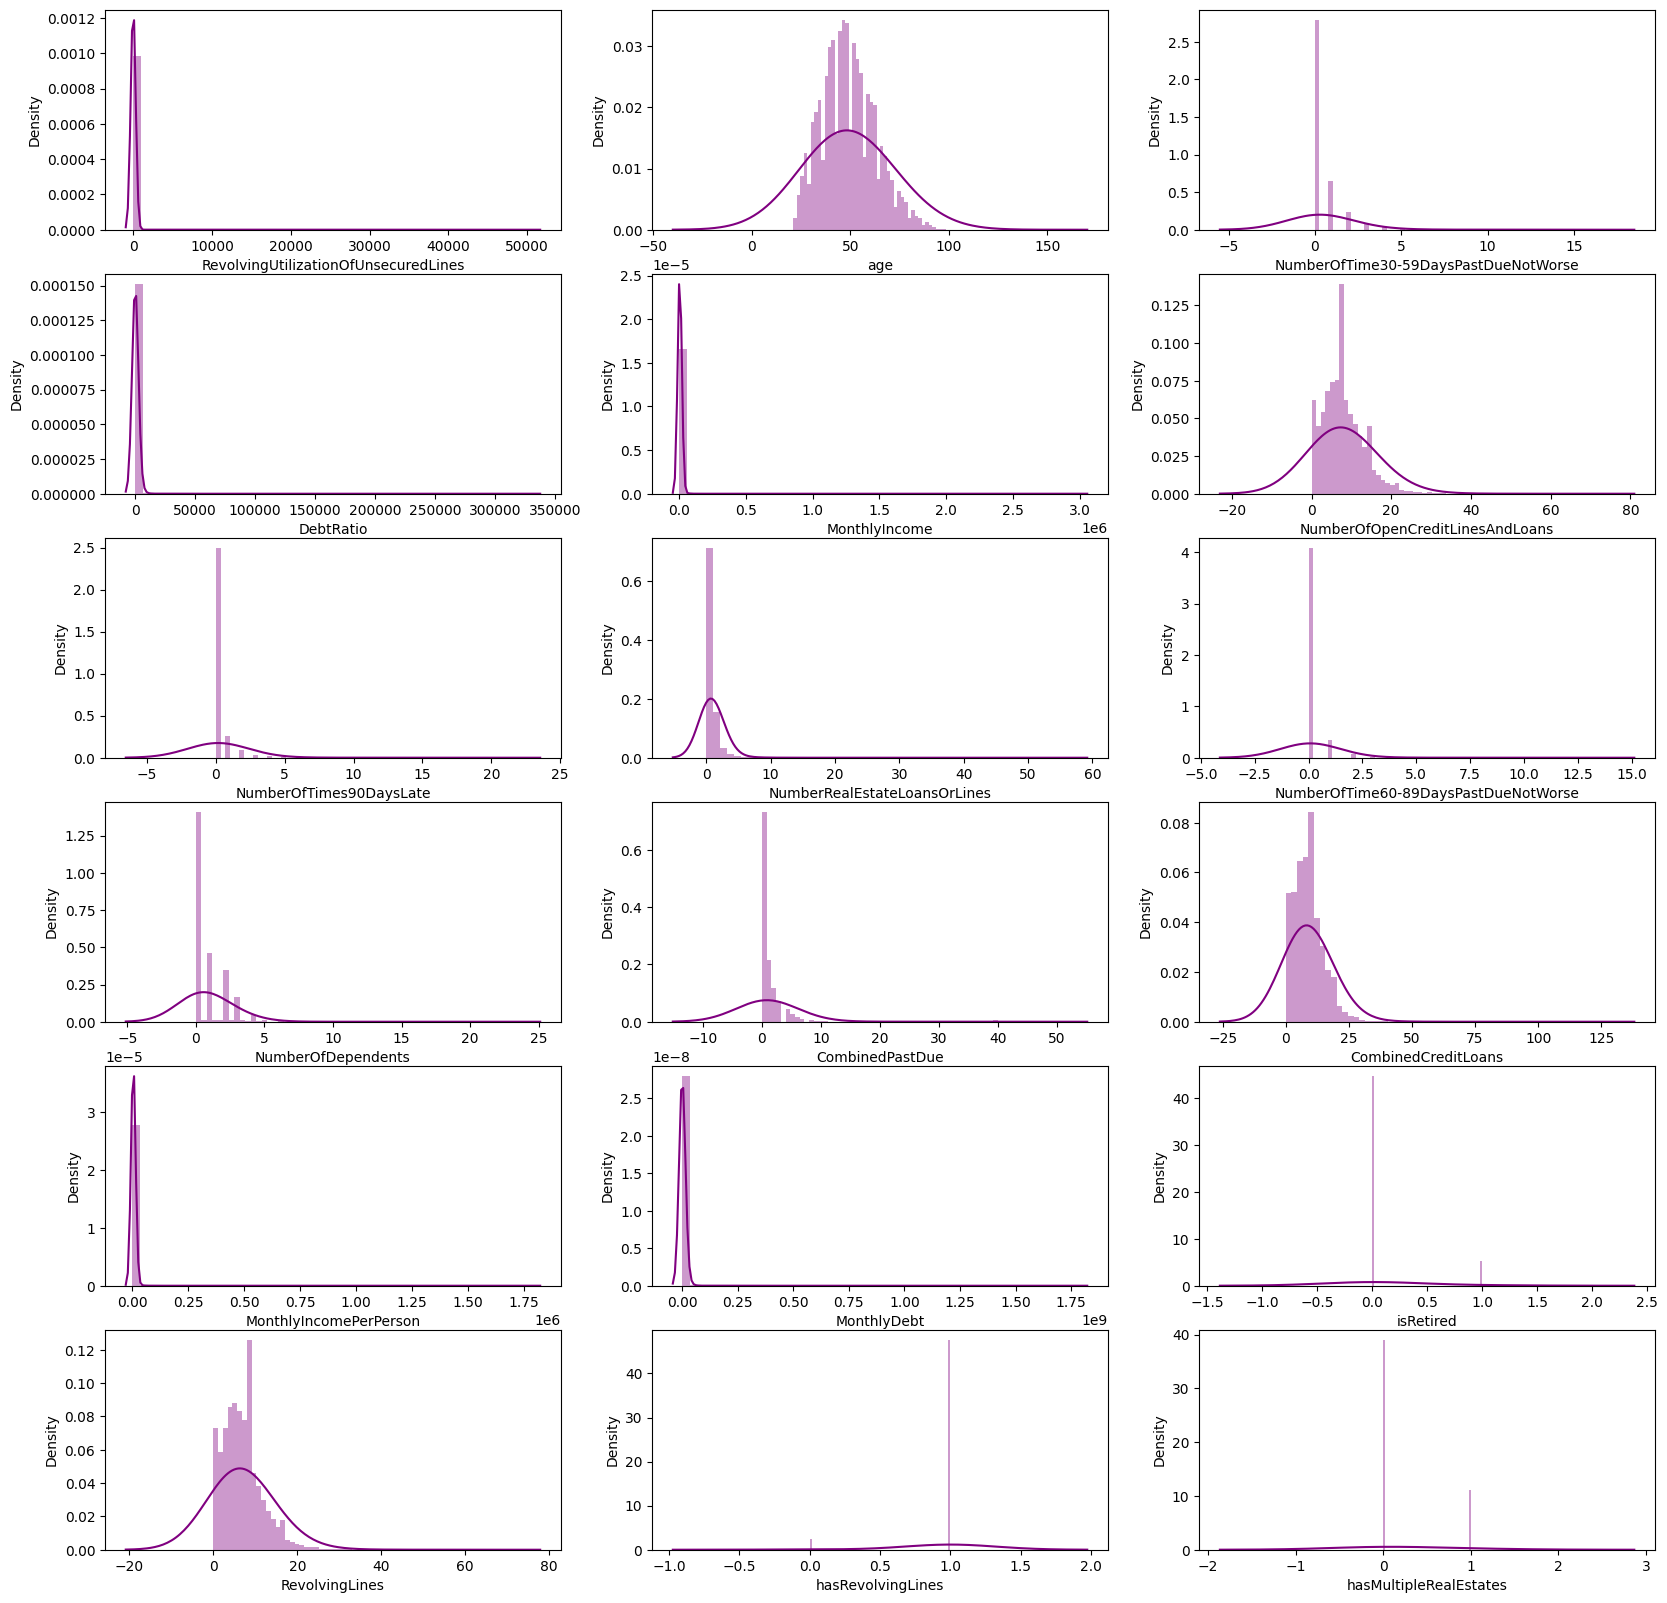

In [140]:
columnList = list(X_test_transformed.columns)

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,19)):
    axes = fig.add_subplot(6,3,i)
    sns.distplot(os_data_X_tranformed[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show()

In [141]:

X_train_transformed = X_train.copy()
def SkewMeasure(data):
    skewness = data.apply(lambda x: skew(x.dropna()))
    return skewness

skewM = SkewMeasure(X_train)

for i in skewM.index:
    X_train_transformed[i] = np.log1p(X_train_transformed[i])


#### Standaradization

In [142]:
scaler = StandardScaler().fit(os_data_X)

X_train_scaled = scaler.transform(os_data_X) 
X_test_scaled = scaler.transform(X_test)

In [143]:
scaler = StandardScaler().fit(X_upsampled_transformed)

X_train_scaled_upsampled = scaler.transform(X_upsampled_transformed) 
X_test_scaled_upsampled = scaler.transform(X_test_standaradized)

In [144]:
scaler = StandardScaler().fit(X_downsampled_transformed)

X_train_scaled_downsampled = scaler.transform(X_downsampled_transformed) 
X_test_scaled_downsampled = scaler.transform(X_test_standaradized)

#### Calculation Of Scores For Various ML models

#### 

In [145]:
def cal_score(y_test, y_pred): 
    cm              = confusion_matrix(y_test, y_pred)
    prec_scr_macro  = precision_score(y_test, y_pred, average='macro')*100
    prec_scr_micro  = precision_score(y_test, y_pred, average='micro')*100
    rec_scr_macro   = recall_score(y_test ,y_pred, average='macro')*100
    rec_scr_micro   = recall_score(y_test ,y_pred, average='micro')*100
    f1_scr_macro    = f1_score(y_test, y_pred, average='macro')*100 
    f1_scr_micro    = f1_score(y_test, y_pred, average='micro')*100 
    return prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm

In [146]:
def metrics_calculation(classifier, training_data, testing_data, training_label, testing_label):
    
    result = []
    cols = ['Mean Accuracy', 'Accuracy deviation', 'Precision Macro', 'Precision Micro', 'Recall Macro','Recall Micro', 'F1 Score Macro', 'F1 Score Micro', 'Confusion Matrix']
    
    crs_val     = cross_val_score(classifier, training_data, training_label, cv=2)
    mean_acc = round(np.mean(crs_val),3)
    std_acc  = round(np.std(crs_val),3)
    classifier.fit(training_data, training_label)
    predictions = classifier.predict(testing_data)
    prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm = cal_score(testing_label, predictions)
    result.extend([mean_acc,std_acc, prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm])
    series_result = pd.Series(data=result, index=cols)
    
    return series_result


In [147]:
clf_dict = {
    'Random Forest': RandomForestClassifier(random_state=42), #n_estimators = 50 or 100
    'Logistic Regression' : LogisticRegression(random_state=42), #max_iter=1000
    'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=42)
}


* ** Training Log transformed dataset using ML algorithms**

In [148]:
os_data_X_log_transformed = np.log1p(os_data_X_transformed)
X_test_log_transformed = np.log1p(X_test_transformed)

frame = {}
for key in clf_dict:
    classifier_result = metrics_calculation(clf_dict[key], os_data_X_log_transformed, X_test_log_transformed, os_data_y, y_test)
    frame[key] = classifier_result

log_smote_X = pd.DataFrame(frame)
log_smote_X

Random Forest  \
Mean Accuracy                              0.916   
Accuracy deviation                         0.006   
Precision Macro                        63.377783   
Precision Micro                        89.422017   
Recall Macro                           69.423882   
Recall Micro                           89.422017   
F1 Score Macro                         65.597166   
F1 Score Micro                         89.422017   
Confusion Matrix    [[25852, 2092], [1076, 929]]   

                             Logistic Regression        DecisionTreeClassifier  
Mean Accuracy                               0.79                         0.859  
Accuracy deviation                         0.004                         0.007  
Precision Macro                         59.20592                     56.005574  
Precision Micro                        79.955925                      81.92928  
Recall Macro                            76.04116                     63.603136  
Recall Micro                           79.955925                      81.92928  
F1 Score Macro                         60.282852                     56.835774  
F1 Score Micro                         79.955925                      81.92928  
Confusion Matrix    [[22512, 5432], [571, 1434]]  [[23686, 4258], [1154, 851]]

* ** Training Standaradized dataset using ML algorithms**

In [149]:
frame_std = {}
for key in clf_dict:

    classifier_result_std = metrics_calculation(clf_dict[key], X_train_scaled, X_test_scaled, os_data_y, y_test)
    frame_std[key]    = classifier_result_std
        
standardized_smote_df = pd.DataFrame(frame_std)
standardized_smote_df

Random Forest  \
Mean Accuracy                              0.917   
Accuracy deviation                         0.006   
Precision Macro                        63.282414   
Precision Micro                        89.428695   
Recall Macro                           69.126531   
Recall Micro                           89.428695   
F1 Score Macro                         65.443907   
F1 Score Micro                         89.428695   
Confusion Matrix    [[25867, 2077], [1089, 916]]   

                             Logistic Regression        DecisionTreeClassifier  
Mean Accuracy                              0.814                          0.86  
Accuracy deviation                         0.014                         0.006  
Precision Macro                        65.907546                     56.242304  
Precision Micro                          91.0982                     82.546997  
Recall Macro                           68.493386                     63.679523  
Recall Micro                             91.0982                     82.546997  
F1 Score Macro                         67.068203                     57.229606  
F1 Score Micro                           91.0982                     82.546997  
Confusion Matrix    [[26433, 1511], [1155, 850]]  [[23882, 4062], [1165, 840]]

* ** Plotting ROC AUC for the ML models for the transformed dataset**

In [150]:

models = [
    {'model': RandomForestClassifier(), 'label': 'Random Forest'},
    {'model': LogisticRegression(), 'label': 'Logistic Regression'},
    {'model': DecisionTreeClassifier(), 'label': 'Decision Tree'}
]


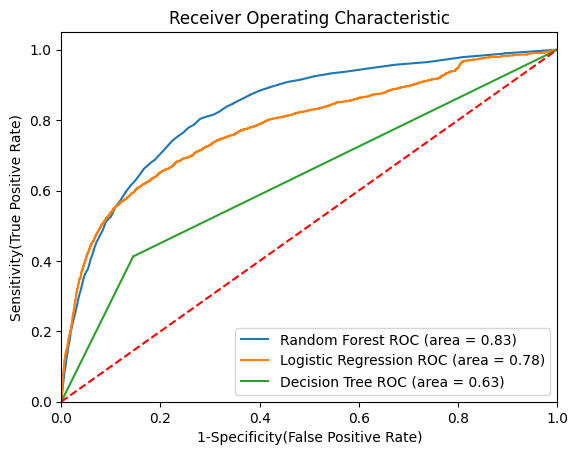

In [151]:

def plot_multiplt_rocauc(models, train_X, train_y, dev_X, dev_y):
    for m in models:
        model = m['model']
        model.fit(train_X, train_y)
        y_pred = model.predict(dev_X)
        pred = model.predict_proba(dev_X)
        pred_new = [i[1] for i in pred]
        fpr, tpr, thresholds = roc_curve(dev_y, pred_new)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()  

plot_multiplt_rocauc(models, X_train_scaled, os_data_y, X_test_scaled, y_test)



**Feature Importance

In [152]:
def plot_feature_importances(model, data):
    plt.figure(figsize=(8,6))
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

def plot_logistic_coefficients(model, data):
    coefficients = model.coef_[0]
    coef_df = pd.DataFrame({
        'Feature': data.columns,
        'Coefficient': coefficients
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    plt.figure(figsize=(8,6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], align='center')
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.show()



Model is Random Forest


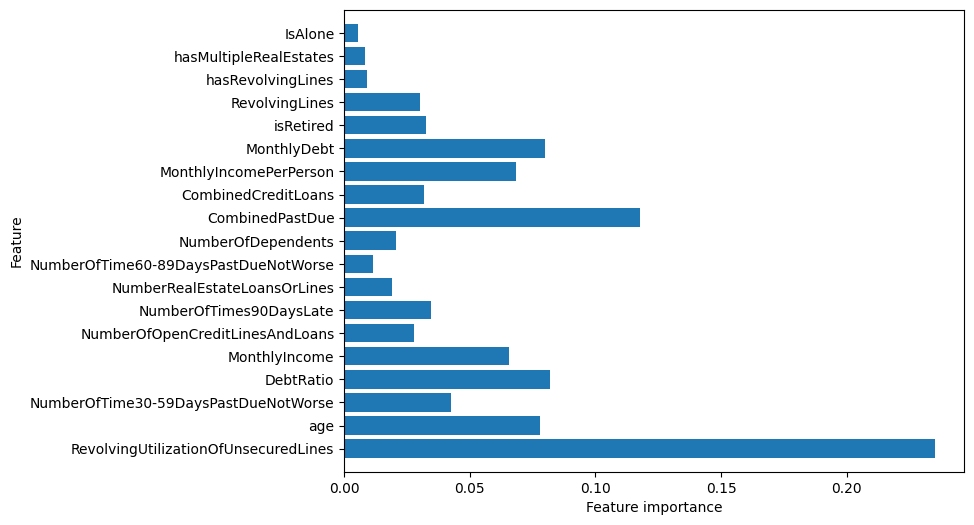

Model is Logistic Regression


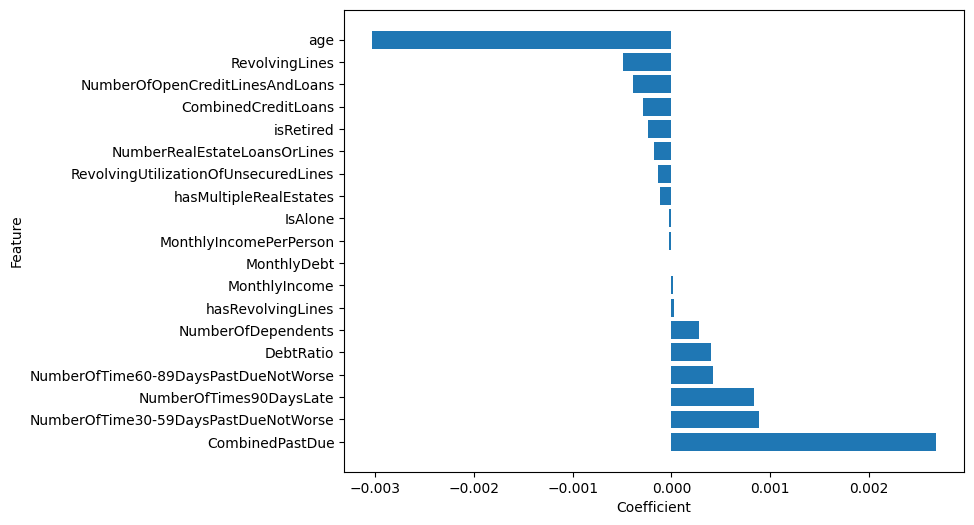

Model is DecisionTreeClassifier


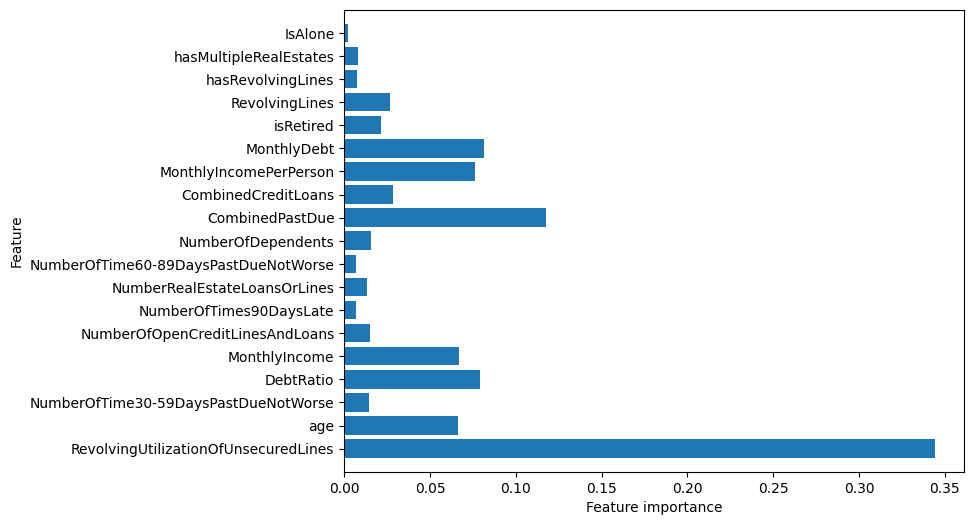

In [153]:

for key in clf_dict.keys():
    model = clf_dict[key]
    model.fit(os_data_X_tranformed, os_data_y)
    print('Model is', key)
    
    if hasattr(model, 'feature_importances_'):
        plot_feature_importances(model, os_data_X_tranformed)
    elif hasattr(model, 'coef_'):
        plot_logistic_coefficients(model, os_data_X_tranformed)
    else:
        print(f"Model {key} does not have feature importances or coefficients.")

In [154]:
rf_model = RandomForestClassifier(
    n_estimators=100,       
    max_depth=4,           
    min_samples_split=2,    
    min_samples_leaf=1,    
    random_state=42,      
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
print('Model is Random Forest')


Model is Random Forest


In [155]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedPastDue', 'CombinedCreditLoans',
       'MonthlyIncomePerPerson', 'MonthlyDebt', 'isRetired', 'RevolvingLines',
       'hasRevolvingLines', 'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

In [156]:
X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedPastDue', 'CombinedCreditLoans',
       'MonthlyIncomePerPerson', 'MonthlyDebt', 'isRetired', 'RevolvingLines',
       'hasRevolvingLines', 'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

In [157]:
X_test_clean = X_test.drop(columns=['predictions'], errors='ignore').copy()
y_pred = rf_model.predict(X_test_clean)
X_test['predictions'] = y_pred
predict_rf = lambda x: rf_model.predict_proba(x).astype(float)
probabilities = predict_rf(X_test_clean)


In [158]:
X_test = X_test.drop('predictions', axis=1)
explainer = LimeTabularExplainer(X_test.values, mode="classification", feature_names=X_test.columns)

## Predictions

In [159]:

i = 20
X_observation = X_test.iloc[[i], :]
explanation = explainer.explain_instance(X_observation.values[0],predict_rf  )
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)
        

0.8882006669221654


In [160]:

i = 9739
X_observation = X_test.iloc[[i], :]
explanation = explainer.explain_instance(X_observation.values[0],predict_rf  )
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)
        

0.8883782323647003
